In [13]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [18]:
import sys
np.set_printoptions(threshold=sys.maxsize)

In [64]:
# Thresholding value
t_val = 200

# Output colours
colours = {
    "red":np.array([217, 80, 64, 255]),
    "amber":np.array([242, 189, 66, 255]),
    "green":np.array([88, 165, 92, 255]),
    "black":np.array([40, 40, 40, 255]),
}

In [56]:
# Import the image
colour_icon = (cv2.cvtColor(cv2.imread("./bee_pub.png"), cv2.COLOR_BGR2RGB)).astype(np.uint8)

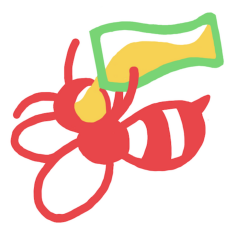

In [57]:
def show_colour_image(img, save_img_name=None):
    if save_img_name != None:
        cv2.imwrite('img_out/' + save_img_name + '.jpg', img)
    
    plt.imshow(img, vmin=0, vmax=255)
    plt.axis('off')
    plt.show()
    
show_colour_image(colour_icon)  

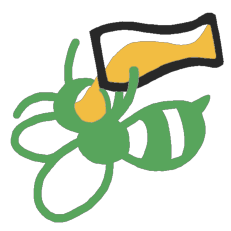

In [65]:
# Swap the thresheld values for the input colours
def swap_colours(img, r_replace, g_replace, y_replace, w_replace=0):

    output_img = np.full((*img.shape[:2], 4), w_replace, dtype=np.uint8)
    for i, row in enumerate(img):
        for j, pix in enumerate(row):
            r, g, b = pix
            if r > 200 and g > 200 and b < 150:
                output_img[i, j] = y_replace
            elif r > 200 and g < 150 and b < 150:
                output_img[i, j] = r_replace
            elif r < 150 and g > 200 and b < 150:
                output_img[i, j] = g_replace
            
    return output_img

out_img = swap_colours(colour_icon, colours["green"], colours["black"], colours["amber"])
show_colour_image(out_img)

In [69]:
cv2.imwrite('bee_pub_colour_fix.png', cv2.cvtColor(out_img, cv2.COLOR_RGBA2BGRA))

True